# Introduction to Linear Regression

## Overview

* What is linear regression?
    * Model goals and mathematical form
* How does linear regression learn from data?
    * Error and evaluation, model assumptions
* Interpreting linear regression models
    * Weights and biases
* Performing linear regression in `sklearn`

In this learning unit, we'll take a hands-on approach to linear regression.

We'll cover the basic technical details of the model and what it is used for. You'll see what it takes to fit (or train, or learn, depending on your preferred term for it!) a linear regression model and how such models are evaluated and interpreted.

Then we'll go through some practical examples using sklearn.

## What is linear regression?

* A supervised learning algorithm
* A few hundred years old [(With multiple "inventors"...)](https://priceonomics.com/the-discovery-of-statistical-regression/)
* Maps a vector of $d$ input variables $[x_0, x_1, \dots, x_d]$ to a single, continuous, output variable $y$
* Fast, robust, explainable

Linear regression is a supervised learning algorithm, meaning that you must have training data available beforehand.

This training data consists of inputs and their known outputs. For example, if you want to use humidity and wind speed to predict air temperature, you will need multiple examples of all three. This would give you an input vector [humidity, wind speed] that maps to a single value of air temperature.

Here, we use "variables" to refer to the individual items, but in machine learning these are generally referred to as "features".

Compared to more modern techniques, it's very fast to train and get new predictions from. You don't need millions of data points. It can handle a wide variety of input data (though this may need to be regularised, normalised or standardised first) and comes with few restrictions. And the final model has some properties which allow us to construct understandable explanations for the relationship between the model inputs and outputs.

## Linear regression: goals

* Use a line to model relationship between
    * input feature (e.g. weight)
    * output variable (e.g. volume)
* Lots of possible lines!
    * Need to find the best line
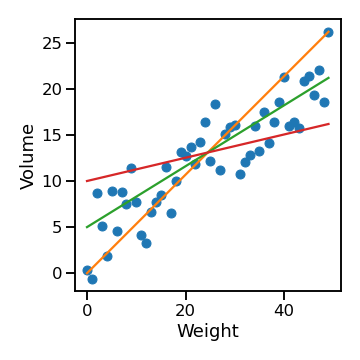

The general goal of linear regression is, given your training data, find some line which best describes the data.

There are many possible lines, and you can see three possible solutions on the right here.

But we want the best one - that is the line which has the least error when the predictions it makes are compared to the expected predictions, based on the training data.

How do we find that line? Before we can do that, we need to understand the mathematical form of linear regression.

## Linear regression: form

$$y = wx + b$$

* $y$ : value of output variable (continuos)
* $x$ : value of input feature
* $w$ : weight/importance of $x$
* $b$ : bias term

The simplest linear model uses one number to approximately predict another.

Because there is noise in the relationship between x and y, the model multiplies x by some value (w) then adds a constant (b).

This is exactly the equation of a straight line. The weight determines the slope of the line, the bias determines the y-intercept of the line.

So the weight determines how much the value of x changes, relative to y. And the bias (or error term, in some literature) is essentially a measure of the noise between x and y.

But where do the values for w and b come from?

## Linear regression: form

* $x$ and $y$ are *variables* of our data
* $w$ and $b$ are *parameters* of the linear model
* We provide the variables, the model learns the parameters
* $x$ can change, but parameters are fixed once learned

It's important to distinguish between the components of the linear regression model.

x and y are variables (or features) in our training data. This is used by the model to learn its parameters.

Then, if we have a new x and want to predict its associated y, then we can use the trained model to predict this.

y must be a continuous variable. x should be too, but it is possible to convert nominal/discrete values for use in a linear regression model.

## Linear regression: error

* Model needs to learn parameters
* Best model has parameters which most closely predict $y$ given $x$
    * This is minimising model error
* Standard measure is the sum of squared errors $$\sum_{i=1}^{n}(y_i - \widehat{y}_i)^2 \quad$$


In order to train the model and learn the parameters, we could try every single possible combination of values for $w$ and $b$.

Imagine that was possible. We then need a way to determine when the best parameters have been found and select the model that has those parameters.

Intuitively, this should be the model whose parameters allow it to most closely predict the output values.

The standard error measure is the sum of squared errors. This simply adds up all the squared differences between the true value ($y$) and model prediction ($\widehat{y}$).

## Linear regression: evaluation

* R² score: evaluates the linear relation between model predictions $\hat{y} \in \hat{Y}$ and ground truth $y \in Y$ 
    * Mean squared error (MSE) normalised by average deviation from the ground truth mean 
    * Equal to 1.0 when a perfect relation
    * Always predicting the mean of all ground truth values would score 0
    
*  R² = $1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
    * Numerator is MSE
    * $\bar{y}$ is the mean of the ground truth values

We want to minimise error during model training, to find the best model parameters.

But a performance metric like R2 will describe how well that model represents the training data. This is useful for when we have two different linear models (perhaps using different features) - both have minimised error to find the best parameters, but we want to compare the two models to each other.

## Linear regression: interpretation

Learned parameters are informative:

$y$ = $w$$x$+$b$

* $w$ is the amount we expect $y$ to change, given a single unit change in $x$
* Larger $w$ means $x$ is more important
* $b$ is the expected mean value of $y$ when all input features equal 0

In the simple model we have been using so far, where there is one feature in x being used to predict y, the weight and bias parameters learned by the model can be interpreted in an informative way. The weight for x expresses the average increase/decrease expected in y if x increases by one unit (e.g. 1kg if x measures mass).

This generalises to more complex models where the input is a vector containing multiple features. Each component will have its own associated weight.

The value of the bias term also has some meaning, but this isn't generally very useful to us. It's simply the value that y will be if x is 0!

Before we look at how this line is found, let's go over some of the main assumptions the linear regression model makes about the data and the modelling process.

## Linear regression: linearity

/Users/matteomazzeri/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


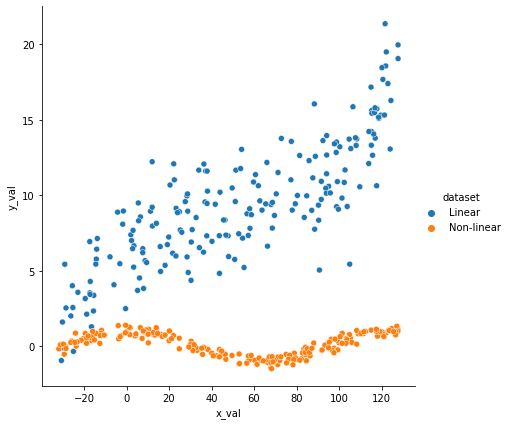

In [1]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('data/data.csv')

sns.relplot(data=data, x='x_val', y='y_val', hue='dataset', height=6);

First, the output variable should be a linear combination of each individual input variable, when all other variables are held fixed. So, that point doesn't depend on any other variables having a particular value.

However, this is really only a limitation on the parameters the model will learn and not your actual input data. We will go into more detail, later on, on what it means to learn parameters.

In practice, you can test this assumption by visualising x against y and seeing if there are any non-linear patterns in the scatter plot. If your data is non-linear, you should probably consider using a non-linear model, although it is often possible to transform features to make them linear.

## Linear regression: independence

In [2]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes['data'])
# Look at first five features only
X[[0,1,2,3,4]].corr()

,0,1,2,3,4
0,1.000000,0.173737,0.185085,0.335427,0.260061
1,0.173737,1.000000,0.088161,0.241013,0.035277
2,0.185085,0.088161,1.000000,0.395415,0.249777
3,0.335427,0.241013,0.395415,1.000000,0.242470
4,0.260061,0.035277,0.249777,0.242470,1.000000


Second, there should be no relationship between the individual features/input variables. That is, they must not be colinear - you should not be able to predict one input variable using one (or more) of the others.

One obvious example would be if one feature is always exactly twice the value of another. In a model with two features which are perfectly colinear, the weights of each would be the exactly half of a model which only one feature. This makes it difficult to perform valid significance tests or interpret the model later on.

In practice, you can detect this by using a correlation matrix (see the `pands.DataFrame.corr()` method) and drop highly correlated features.

In the examples we are looking at here, we only have a single input feature so colinearity is not really an issue!

## Linear regression: independence

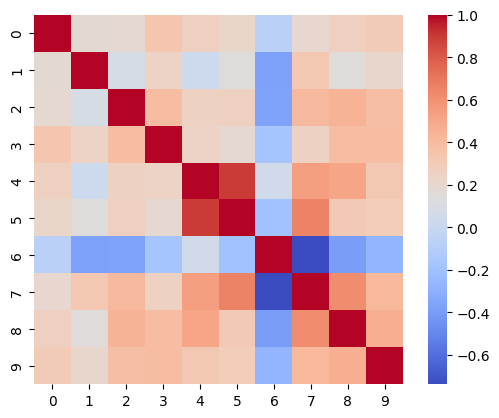

In [3]:
import seaborn as sns

sns.heatmap(X.corr(), cmap='coolwarm', square=True);




It's usually easier to visualise this as a heatmap, using a divergent colour map to show the different points at -1, 0 and +1.

This is especially useful if you have a lot of features to look at.

The diagonal is all red, because features obviously perfectly correlate with themselves.

## Linear regression: constant variance

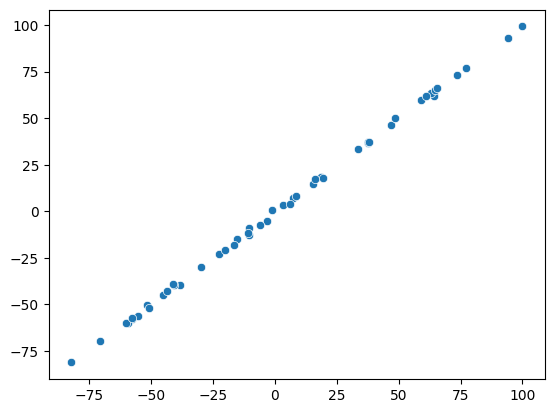

In [4]:
import numpy as np

y_pred = np.random.normal(0, 50, 50)
y_true = np.random.normal(0, 1, 50)

residuals = y_pred - y_true

sns.scatterplot(x=y_pred, y=residuals);

Third, all the values of the output variable must have the same degree of variance in their error, independent of the input variables and their mean should be around 0. This is known as homoscedasticity. The error, also called the residuals, of the input variables is essentially the difference between the predicted value and the expected value.

That is, the variable you want to predict must have an error range which is the same no matter what the input was.

For example, say your model aims to predict the value of plots of land. You use a linear regression model, which takes in various features as input.

If your model predicts a value of £1,000,000 and this has a standard deviation of £100,000 compared to the true value, then this doesn't really work as a constant when the predicted value is £50,000 - the same standard deviation is too large compared to the prediction.

In practice, this means you need to carefully consider the reality of what you are trying to predict - does it make sense for the predicted variable to always have the same standard deviation, no matter what the input represents?

If not, then there are some linear models which relax this assumption, or you could transform the output variable in an appropriate manner (e.g. log or Box transform).

You can test for constant variance by visualising the residuals of your model against the predictions of the model. They should have a mean value around zero and seem to be randomly scattered, with no structure to them.

The example given here uses random data but the process is the same in practice. The only difference will be that y_true comes from your dataset and y_pred comes from your model.

## Linear regression: normality

Checking the normality assumption of the residuals

In [7]:
from scipy.stats import shapiro

x1 = np.random.normal(1, 10, 100)
x2 = np.random.poisson(5, 100)
x3 = np.random.uniform(size=100)

y_pred = np.random.normal(0, 50, 50)
y_true = np.random.normal(0, 1, 50)
residuals = y_pred - y_true

shapiro(x1), shapiro(x2), shapiro(x3), shapiro(residuals)

# Recall:
# alpha = 0.5
# p <= alpha: reject H0, not normal
# p > alpha: fail to reject H0, normal
# In general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian 

(ShapiroResult(statistic=0.9750575423240662, pvalue=0.054519347846508026),
 ShapiroResult(statistic=0.9560552835464478, pvalue=0.002125362167134881),
 ShapiroResult(statistic=0.941590428352356, pvalue=0.00024136250431183726),
 ShapiroResult(statistic=0.9739300608634949, pvalue=0.33191508054733276))

Finally, the distribution of residuals should also be normal.

You can perform statistical tests for this, such as Shapiro-Wilk's W test or the Kolmogorov-Smirnov test. These test the null hypothesis that a collection of samples were drawn from a population which has a normal distribution. 

In practice, non-normality of the residuals is really only an issue when you have few examples in your dataset. With enough data (a few hundred) this is overcome.

Here you can see the outcome of Shapiro-Wilk's W test. If the distribution is not normal, then the p-value will be less than 0.05.

## Linear regression: assumptions

* Linearity
    * Relationship of x to y is linear
* Independence
    * No features in our data are correlated/colinear (assessed this with .corr() and the heatmap)
* Constant variance
    * Errors of the model predictions (residuals) must have same standard deviation (use a plot of predicted values vs residuals)
* Normality
    * Errors of the model predictions (residuals) should be normally distributed (use shapiro test)

A quick summary of the four assumptions.

## Linear regression: naive example

Manual training by hand is possible but unlikely to find the best solution quickly!

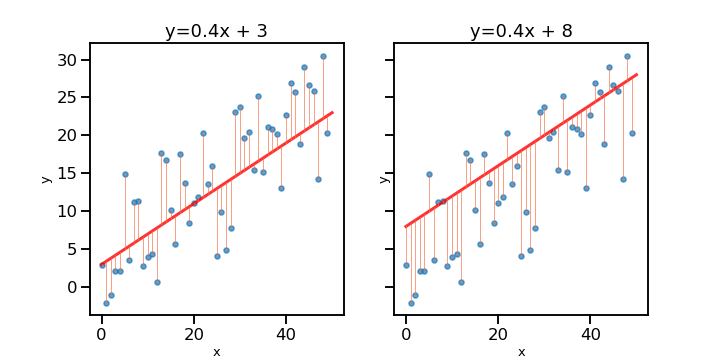



Let's assume we have met all the relevant assumptions and want to train a linear regression model.

To naively learn $b$ and $w$, we could try this approach manually by hand:

1) Gather our training data - for each x, what is the true y value?

2) Plot it and draw a line through it

3) Calculate the weight (slope) and bias (intercept) of the line

4) For each x value, find the difference between the true y (the dot) and the predicted y (the line). Square it. Add all of them together.

5) Repeat 2-4 as many times as you can bear.

6) Select the line which has the lowest value from step 4.

7) The weight/bias of that line are the parameters of the best linear regression model.

Fortunately, there are mathematically and computationally efficient methods for finding the parameters that best minimise the error.

Let's look at these in Python.

## Linear regression: sklearn

`sklearn.linear_model.LinearRegression`

* Implements linear regression
* Takes care of learning $w$ and $b$ with `.fit()` method
* $x$ can be as many features as you like
* Easy to get model predictions

From here on, we will look at using linear regression in Python. We won't concern ourselves with the behind-the-scenes details of how the model is learned. Instead, we will focus on getting data into the model and predictions out of it.

## Linear regression: sklearn

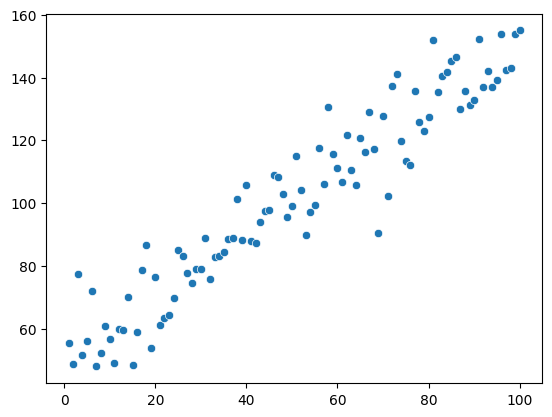

In [18]:
import seaborn as sns
import numpy as np

# To make sure random results are the same each time:
np.random.seed(5)

# Generate monotonic increasing values for x, 1 to 100
x = np.linspace(1,100, 100)
# Add a little random noise to each x, to get a y value
y = [i + np.random.normal(loc=50, scale=10) for i in x]

sns.scatterplot(x=x, y=y);

First, let's generate some data where there is a linear relation between x and y, but with a little bit of noise added to each.

We'll stick with the simple univariate model, where x is just a single variable each time. It's easier to visualise this!

## Linear regression: sklearn

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# When using a single feature in sklearn, it must be reshaped
# from the form [1,2,3,4,5] to [[1],[2],[3],[4],[5]] x.reshape(-1, 1) does that 
x = x.reshape(-1, 1)

model.fit(x, y)





LinearRegression()

In [22]:
print(f"Weight for single feature x: {model.coef_}\n") # this is our w
print(f"Bias term for model: {model.intercept_}\n") # this is our b
print(f"R2 score for model: {model.score(x, y)}\n") # this is our evaluation metric

Weight for single feature x: [1.00267182]

Bias term for model: 50.780539516535725

R2 score for model: 0.9062438135842042



We can instantiate a linear regression model with one line, then fit the data to it.

This will automatically find the best model parameters - the weight for x and the bias.

Note: Because we only have a single feature, we need to reshape the array for sklearn. This turns it from [1,2,3,4] into [[1],[2],[3],[4]]

Once the model has been trained, we can view the parameters it learned from the data.

Note: sklearn refers to weight/bias as coef_/intercept_ - coef_ is just short for coefficient and is the terminology from linear algebra.

We can see that for every unit change in the value of x, we can expect y to increase by approximately 1.

We can also get the R2 score of the model, by using the `.score()` method and passing back in the original data. This is a pretty high R2 score, which probably isn't surprising given how the data looked when we plotted it.

## Linear regression: sklearn

$y$ = $w$$x$+$b$

We have found that for our model, this equation is

y = 1.00 $x$ + 50.78

In [23]:
unseen_x = [[-1], [103], [150], [200]]

model.predict(unseen_x)

array([ 49.7778677 , 154.055737  , 201.18131255, 251.31490356])

Once a model has been trained using `.fit()`, we can get predictions for new values of x using the `.predict()` method.

Here, the model has been given some input it was never trained on (it was only trained on values of x between 1 and 100).

You can see that each prediction is just that x value, multiplied by ~1.003 and then ~50.8 added on.

## Linear regression: summary

* Models a linear relationship between $x$ and $y$
* Simplest linear regression: $y = wx + b$
* Learn weight of $x$ and bias term from data

In this learning unit we looked at the basics of the linear regression model, used to model approximately linear relationships between variables. We specifically considered the univariate case of regression, where a single input feature is used to predict a single output variable.

In addition to looking at the form of the model and how it learns from data, some of the main assumptions of the model were outlined. Much of this focuses on the relationship between the input features and the variable you want to predict.

In the practical, we'll look at working with simple linear regression in python.

## Jupyter Exercise

Open file `intro-linear-regression-practical.ipynb`